# EDA

## Setup

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
def toPercent(__data):
    for idx in __data.index:
        __data.loc[idx] = round(__data.loc[idx] / __data.loc[idx].sum() * 100)
    return

def viz_corr(col_name1, col_name2, __data):
    _tmp = __data.groupby([col_name1, col_name2]).count().reset_index()
    _tmp['num'] = _tmp['source']
    _corr = _tmp[[col_name1, col_name2, 'num']].sort_values(by=[col_name1, 'num'], ascending=False)
    _corr = _corr.pivot(col_name1, col_name2, 'num').fillna(0)
    # _corr.loc['Bán thời gian'] = round(_corr.loc['Bán thời gian'] / _corr.loc['Bán thời gian'].sum() * 100)
    toPercent(_corr)
    _corr = _corr.astype('int32')
    ax = sns.heatmap(_corr, annot=True, fmt='d', cmap="YlGnBu")
    return

def viz_corr_num(col_name1, col_name2, __data):
    _tmp = __data.groupby([col_name1, col_name2]).count().reset_index()
    _tmp['num'] = _tmp['source']
    _corr = _tmp[[col_name1, col_name2, 'num']].sort_values(by=[col_name1, 'num'], ascending=False)
    _corr = _corr.pivot(col_name1, col_name2, 'num').fillna(0)
    _corr = _corr.astype('int32')
    ax = sns.heatmap(_corr, annot=True, fmt='d', cmap="YlGnBu")
    return

def trans_data(val, col_name, trans_dict):
    res = trans_dict[col_name][val]
    return res

def get_unique(col_name, df):
    return list(df[col_name].unique())

def get_label_from_salary(s):
    return s['label']

## Data info

In [13]:
data_dir = "data/"

In [14]:
careerbuilder = pd.read_json(data_dir + 'careerbuilder')
mywork = pd.read_json(data_dir + 'mywork')
topcv = pd.read_json(data_dir + 'topcv')

In [15]:
cols_of_careerbuilder = ['_id', 'url', 'title', 'update_time', 'img_url', 'sectors',
       'application_deadline', 'salary', 'job_formality',
       'job_experience_years', 'required_gender_specific', 'job_attributes',
       'job_descriptions', 'job_requirements', 'company_name',
       'company_address', 'company_url', 'timestampISOdate']

cols_of_topcv = ['_id', 'url', 'title', 'img_url', 'sectors', 'application_deadline',
       'salary', 'job_attributes', 'job_formality', 'required_gender_specific',
       'job_experience_years', 'job_descriptions', 'job_requirements',
       'company_name', 'company_address', 'company_url', 'timestampISOdate']

cols = ['sectors', 'salary', 'job_attributes', 'job_formality',
       'required_gender_specific', 'job_experience_years', 'job_requirements',
       'company_name', 'company_address', 'source']

topcv['source'] = 'topcv'

dataCenter = topcv
dataCenter = dataCenter[cols]

In [16]:
dataCenter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sectors                   8973 non-null   object
 1   salary                    8973 non-null   object
 2   job_attributes            8973 non-null   object
 3   job_formality             8973 non-null   object
 4   required_gender_specific  8973 non-null   object
 5   job_experience_years      8973 non-null   object
 6   job_requirements          8973 non-null   object
 7   company_name              8973 non-null   object
 8   company_address           8973 non-null   object
 9   source                    8973 non-null   object
dtypes: object(10)
memory usage: 701.1+ KB


In [7]:
dataCenter.T

,0,1,2,3,4,5,6,7,8,9,...,8963,8964,8965,8966,8967,8968,8969,8970,8971,8972
sectors,"[Kinh doanh / Bán hàng, Tư vấn]","[Marketing / Truyền thông / Quảng cáo, Báo chí...","[Bất động sản, Kinh doanh / Bán hàng, Tư vấn]",[Sản xuất],"[Kinh doanh / Bán hàng, Bảo hiểm, Tư vấn]","[Thư ký / Trợ lý, Kinh doanh / Bán hàng, Marke...","[Kinh doanh / Bán hàng, Tư vấn, Tài chính / Đầ...","[Kế toán / Kiểm toán, Ngân hàng / Tài chính]","[Cơ khí / Chế tạo / Tự động hóa, Điện tử viễn ...","[Marketing / Truyền thông / Quảng cáo, Báo chí...",...,"[Kinh doanh / Bán hàng, Bất động sản, Tư vấn]","[Bảo hiểm, Ngân hàng / Tài chính, Tài chính / ...","[Kinh doanh / Bán hàng, Xây dựng, Kiến trúc]",[Biên / Phiên dịch],"[Kinh doanh / Bán hàng, Điện / Điện tử / Điện ...","[Hoạch định/Dự án, Thời trang]","[Kinh doanh / Bán hàng, Hành chính / Văn phòng...","[Hành chính / Văn phòng, Kế toán / Kiểm toán, ...","[Kế toán / Kiểm toán, Hành chính / Văn phòng, ...","[Kinh doanh / Bán hàng, Tư vấn, Y tế / Dược]"
salary,"{'label': '5 - 10 triệu', 'salary': '8-15 triệu'}","{'label': '5 - 10 triệu', 'salary': '8-15 triệu'}","{'label': 'Trên 30 triệu', 'salary': 'Trên 50 ...","{'label': '5 - 10 triệu', 'salary': '7-8 triệu'}","{'label': '20 - 25 triệu', 'salary': 'Trên 20 ...","{'label': '5 - 10 triệu', 'salary': '8-18 triệ...","{'label': '10 - 15 triệu', 'salary': '10-15 tr...","{'label': '10 - 15 triệu', 'salary': '12-18 tr...","{'label': '10 - 15 triệu', 'salary': '10-15 tr...","{'label': '10 - 15 triệu', 'salary': '12-20 tr...",...,"{'label': 'Trên 30 triệu', 'salary': 'Tới 200 ...","{'label': '5 - 10 triệu', 'salary': '7-21 triệu'}","{'label': '25 - 30 triệu', 'salary': '25-35 tr...","{'label': '10 - 15 triệu', 'salary': '12-20 tr...","{'label': 'Thỏa thuận', 'salary': 'Thoả thuận'}","{'label': 'Thỏa thuận', 'salary': 'Thoả thuận'}","{'label': '10 - 15 triệu', 'salary': 'Trên 10 ...","{'label': '5 - 10 triệu', 'salary': '8-10 triệu'}","{'label': '10 - 15 triệu', 'salary': '10-16 tr...","{'label': '10 - 15 triệu', 'salary': 'Tới 12 t..."
job_attributes,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,...,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian
job_formality,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,...,Nhân viên,Nhân viên,Quản lý / Giám sát,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Trưởng/Phó phòng,Nhân viên
required_gender_specific,Không yêu cầu,Không yêu cầu,Không yêu cầu,Nam,Không yêu cầu,Nữ,Không yêu cầu,Không yêu cầu,Không yêu cầu,Không yêu cầu,...,Không yêu cầu,Không yêu cầu,Không yêu cầu,Không yêu cầu,Không yêu cầu,Không yêu cầu,Nữ,Nữ,Không yêu cầu,Nữ
job_experience_years,Không yêu cầu kinh nghiệm,1 năm,Không yêu cầu kinh nghiệm,Không yêu cầu kinh nghiệm,1 năm,Không yêu cầu kinh nghiệm,Dưới 1 năm,1 năm,1 năm,2 năm,...,Dưới 1 năm,1 năm,2 năm,1 năm,1 năm,1 năm,1 năm,2 năm,2 năm,1 năm
job_requirements,- Trình độ: từ trung cấp trở lên- Sinh năm 199...,Có sự đam mê đối với hướng ngành SEO - Content...,- Nam/nữ ngoại hình ưa nhìn.- Đam mê với công ...,- Ứng viên tốt nghiệp Cao đẳng/Đại học các chu...,- Độ tuổi từ 25-45\n- Trình độ Trung Cấp trở l...,Giới tính: NữTốt nghiệp cử nhân chuyên ngành l...,- Giao tiếp tốt- Ưu tiên ứng viên có kinh nghi...,Tốt nghiệp Cao đẳng- Đại học chuyên ngành kế t...,Tốt nghiệp Cao đẳng/ Đại học chuyên ngành kỹ t...,-\tNam/ Nữ tốt nghiệp Cao đẳng trở lên các chu...,...,"- Nam/ Nữ tuổi từ 20 – 30, trình độ từ trung c...","• Trình độ: Cao đẳng, Đại Học trở lên. • Giới ...",-\tGiới tính: Nam. Tuổi từ 28 - 40.\n-\tTốt ng...,"Kỹ năng tiếng Anh giỏi, giao tiếp tốt, có tính...","• Có tối thiểu 1 năm kinh nghiệm bán hàng, kin...","− Có laptop cá nhân\n− Có kỹ năng chụp ảnh, sử...",- Tốt nghiệp Đại học/ Cao đẳng ngành kinh tế- ...,- 1 năm kinh nghiệm trở lên ở vị trí tương đ

In [34]:
category_cols = ['job_attributes', 'job_formality', 'required_gender_specific',
                 'job_experience_years']

for col in category_cols:
    print(col, "______", get_unique(col, dataCenter))

job_attributes ______ ['Toàn thời gian', 'Remote - Làm việc từ xa', 'Bán thời gian', 'Thực tập']
job_formality ______ ['Nhân viên', 'Trưởng nhóm', 'Trưởng/Phó phòng', 'Quản lý / Giám sát', 'Giám đốc', 'Thực tập sinh', 'Phó giám đốc', 'Trưởng chi nhánh']
required_gender_specific ______ ['Không yêu cầu', 'Nam', 'Nữ']
job_experience_years ______ ['Không yêu cầu kinh nghiệm', '1 năm', 'Dưới 1 năm', '2 năm', '3 năm', '5 năm', '4 năm', 'Trên 5 năm']


## Standard

In [36]:
dataCenter['salary_label'] = dataCenter['salary'].apply(lambda s: get_label_from_salary(s))
# dataCenter['requirements_len'] = dataCenter['job_requirements'].apply(lambda r: len(r))

/home/vinbdi/anaconda3/envs/grey/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
category_cols = ['salary_label', 'job_attributes', 'job_formality', 
                 'required_gender_specific',
                 'job_experience_years']

for col in category_cols:
    print(col, "\n______", get_unique(col, dataCenter))

salary_label 
______ ['5 - 10 triệu', 'Trên 30 triệu', '20 - 25 triệu', '10 - 15 triệu', 'Thỏa thuận', '15 - 20 triệu', '25 - 30 triệu', 'Dưới 5 triệu']
job_attributes 
______ ['Toàn thời gian', 'Remote - Làm việc từ xa', 'Bán thời gian', 'Thực tập']
job_formality 
______ ['Nhân viên', 'Trưởng nhóm', 'Trưởng/Phó phòng', 'Quản lý / Giám sát', 'Giám đốc', 'Thực tập sinh', 'Phó giám đốc', 'Trưởng chi nhánh']
required_gender_specific 
______ ['Không yêu cầu', 'Nam', 'Nữ']
job_experience_years 
______ ['Không yêu cầu kinh nghiệm', '1 năm', 'Dưới 1 năm', '2 năm', '3 năm', '5 năm', '4 năm', 'Trên 5 năm']


In [14]:
salary_mean = {
    '5 - 10 triệu', 
    'Trên 30 triệu', 
    '20 - 25 triệu', 
    '10 - 15 triệu', 
    'Thỏa thuận', 
    '15 - 20 triệu', 
    '25 - 30 triệu', 
    'Dưới 5 triệu'
}

## Statistic

### Viz with count

In [131]:
import pandas as pd
__path_to_df = '../../../database/data_center/dataCenter.csv'
__df = pd.read_csv(__path_to_df)

__cols = ['sectors',
 'salary_label',
 'job_attributes',
 'job_formality',
 'required_gender_specific',
 'job_experience_years',
 'job_requirements',
 'company_name',
 'company_address']

__df = __df[__cols]
__df['source'] = 'jobCenter'

_df = __df.copy()
_df['salary_label'] = _df['salary_label'].fillna('Thỏa thuận')
_df['required_gender_specific'] = _df['required_gender_specific'].fillna('Không yêu cầu')
_df['job_experience_years'] = _df['job_experience_years'].fillna('Không yêu cầu kinh nghiệm')

dataCenter = _df.copy()

<AxesSubplot:>

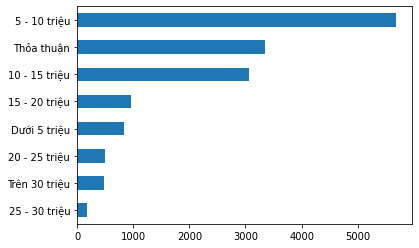

In [45]:
dataCenter['salary_label'].value_counts().sort_values(ascending=True).plot(kind="barh")

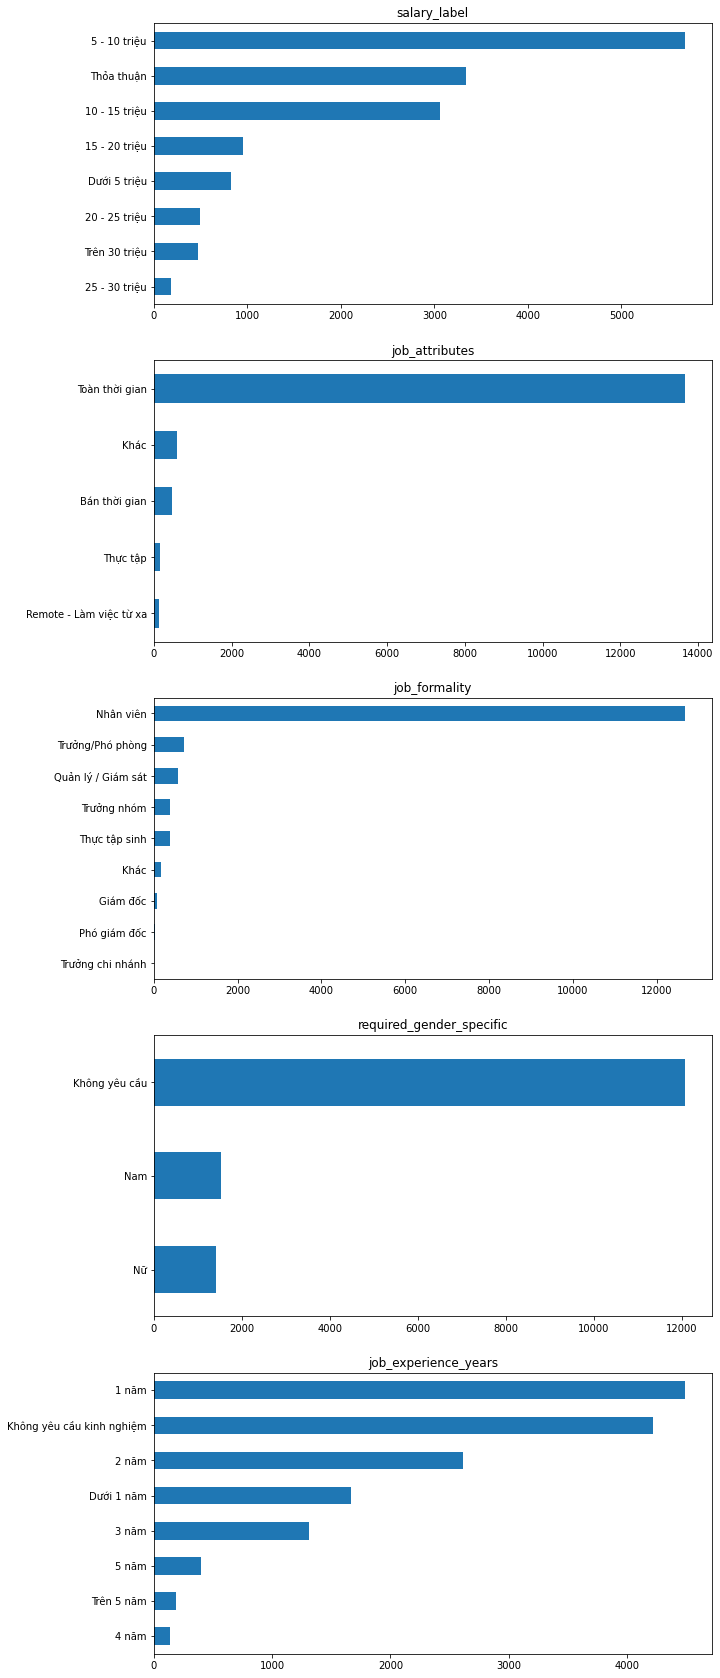

In [46]:
figure, axes = plt.subplots(round(len(category_cols)), 1)

for idx, col in enumerate(category_cols):
    dataCenter[col].value_counts().sort_values(ascending=True).plot(kind="barh", ax=axes[idx], figsize=(10, 30), title=col)


In [47]:
# dataCenter.hist(bins=50, figsize=(20, 15))

### Viz corr

In [48]:
trans_dict = {}

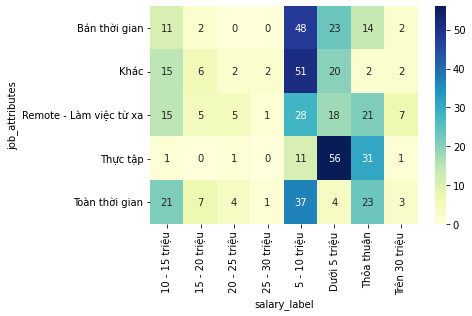

In [49]:
viz_corr('job_attributes', 'salary_label', dataCenter)

> Thuc tap < Khac < Ban thoi gian < Remote < Toan thoi gian

In [132]:
# job_attributes
trans_dict['job_attributes'] = {
    'Thực tập': 1,
    'Khác': 2,
    'Bán thời gian': 3, 
    'Toàn thời gian': 4, 
    'Remote - Làm việc từ xa': 5,
}

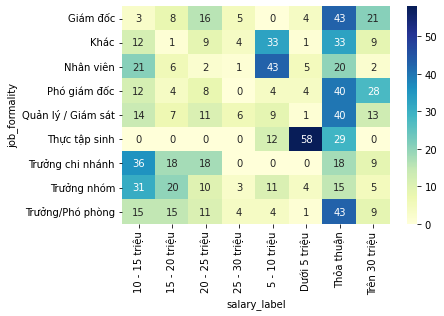

In [51]:
viz_corr('job_formality', 'salary_label', dataCenter)

> Thuc tap sinh < Nhan vien < Khac < Truong chi nhanh < Truong nhom < Quan ly/Giam sat < Truong/pho phong < Pho giam doc < Giam doc

In [133]:
# job_formality
trans_dict['job_formality'] = {
    'Thực tập sinh': 1, 
    'Nhân viên': 2, 
    'Khác': 3,
    'Trưởng chi nhánh': 4,
    'Trưởng nhóm': 5, 
    'Quản lý / Giám sát': 6, 
    'Trưởng/Phó phòng': 7, 
    'Phó giám đốc': 8, 
    'Giám đốc': 9,
}

> 

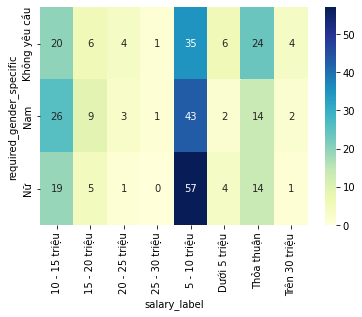

In [134]:
viz_corr('required_gender_specific', 'salary_label', dataCenter)

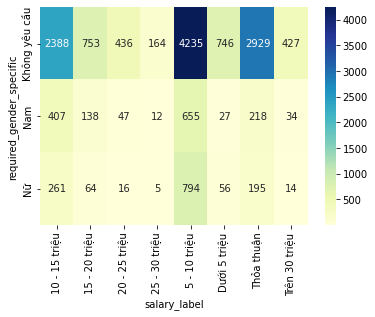

In [135]:
viz_corr_num('required_gender_specific', 'salary_label', dataCenter)

> Nu < Khong yeu cau < Nam

In [136]:
# required_gender_specific
trans_dict['required_gender_specific'] = {
    'Nữ': 1,
    'Không yêu cầu': 2,
    'Nam': 3
}

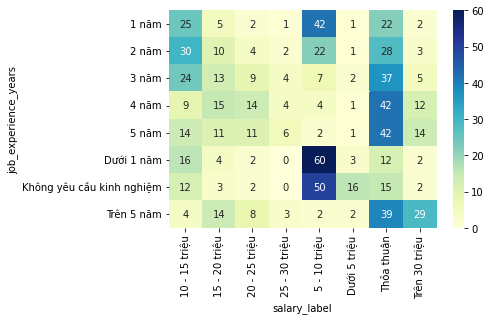

In [137]:
viz_corr('job_experience_years', 'salary_label', dataCenter)

> Duoi 1 nam < Khong yeu cau < 1 nam < 2 nam < 3 nam < 4 nam < 5 nam < Tren 5 nam

In [138]:
# job_experience_years
trans_dict['job_experience_years'] = {
    'Dưới 1 năm': 1, 
    'Không yêu cầu kinh nghiệm': 2, 
    '1 năm': 3, 
    '2 năm': 4, 
    '3 năm': 5, 
    '4 năm': 6, 
    '5 năm': 7, 
    'Trên 5 năm': 8
}

## Preprocess

In [139]:
category_cols = ['salary_label', 'job_attributes', 'job_formality', 
                 'required_gender_specific',
                 'job_experience_years']

for col in category_cols:
    print(col, "\n______", get_unique(col, dataCenter))

salary_label 
______ ['Thỏa thuận', '20 - 25 triệu', 'Trên 30 triệu', '10 - 15 triệu', '5 - 10 triệu', '25 - 30 triệu', 'Dưới 5 triệu', '15 - 20 triệu']
job_attributes 
______ ['Toàn thời gian', 'Bán thời gian', 'Khác', 'Remote - Làm việc từ xa', 'Thực tập']
job_formality 
______ ['Nhân viên', 'Khác', 'Quản lý / Giám sát', 'Trưởng/Phó phòng', 'Thực tập sinh', 'Phó giám đốc', 'Trưởng nhóm', 'Giám đốc', 'Trưởng chi nhánh']
required_gender_specific 
______ ['Không yêu cầu', 'Nữ', 'Nam']
job_experience_years 
______ ['2 năm', 'Không yêu cầu kinh nghiệm', '5 năm', 'Trên 5 năm', '1 năm', '3 năm', 'Dưới 1 năm', '4 năm']


### Salary label Dict

In [146]:
trans_dict['salary_label'] = {
    'Thỏa thuận': 0, 
    'Dưới 5 triệu': 1,
    '5 - 10 triệu': 2, 
    '10 - 15 triệu': 3, 
    '15 - 20 triệu': 4, 
    '20 - 25 triệu': 5, 
    '25 - 30 triệu': 6, 
    'Trên 30 triệu': 7
}

In [147]:
__data = dataCenter.copy()

In [148]:
encoded_data = __data[category_cols]
for col in encoded_data.columns:
    try:
        encoded_data[col] = encoded_data[col].apply(lambda x: trans_data(x,col,trans_dict))
    except:
        print(col)
encoded_data

/home/vinbdi/anaconda3/envs/grey/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years
0,0,4,2,2,4
1,5,4,3,2,2
2,7,4,6,2,7
3,0,4,7,2,8
4,0,4,2,2,3
...,...,...,...,...,...
15016,2,2,2,2,2
15017,2,4,2,2,2
15018,2,2,2,2,2
15019,1,4,5,2,2


In [149]:
# features = ['job_attributes', 'job_formality', 
#             'required_gender_specific',
#             'job_experience_years']

# for f in features:
#     encoded_data[f] = encoded_data[f] / encoded_data[f].max()
# encoded_data

## Train

In [150]:
pred = encoded_data[encoded_data['salary_label'] == 0]
train = encoded_data[encoded_data['salary_label'] != 0]

In [165]:
# train-test split evaluation random forest on the sonar dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = train.drop(columns=['salary_label'])
y = train['salary_label']

print('Shape:',X.shape, y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
print('Shape:',X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# fit the model
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Shape: (11679, 4) (11679,)
Shape: (8175, 4) (3504, 4) (8175,) (3504,)
Accuracy: 0.573


## Predict

In [89]:
X_pred = pred.drop(columns=['salary_label'])
X_pred['salary_label'] = model.predict(X_pred)
X_pred

,job_attributes,job_formality,required_gender_specific,job_experience_years,salary_label
0,3,2,2,4,3
3,3,6,2,8,7
4,3,2,2,3,2
5,3,5,2,8,7
6,3,2,2,4,3
...,...,...,...,...,...
12140,3,2,2,5,3
12148,3,2,2,4,3
12150,3,2,2,3,2
12344,3,2,3,1,2


In [90]:
encoded_data

,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years
0,0,3,2,2,4
1,5,3,9,2,2
2,7,3,5,2,7
3,0,3,6,2,8
4,0,3,2,2,3
...,...,...,...,...,...
15016,2,5,2,2,2
15017,2,3,2,2,2
15018,2,5,2,2,2
15019,1,3,4,2,2


In [91]:
pred_data = encoded_data.copy()
pred_data['salary_prediction'] = pred_data['salary_label']
for i in X_pred.index:
    pred_data.loc[i]['salary_prediction'] = X_pred.loc[i]['salary_label']
pred_data

,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years,salary_prediction
0,0,3,2,2,4,3
1,5,3,9,2,2,5
2,7,3,5,2,7,7
3,0,3,6,2,8,7
4,0,3,2,2,3,2
...,...,...,...,...,...,...
15016,2,5,2,2,2,2
15017,2,3,2,2,2,2
15018,2,5,2,2,2,2
15019,1,3,4,2,2,1


In [92]:
__pred_data = encoded_data.copy()
__pred_data['salary_prediction'] = 0
for i in X_pred.index:
    __pred_data.loc[i]['salary_prediction'] = X_pred.loc[i]['salary_label']
__pred_data

,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years,salary_prediction
0,0,3,2,2,4,3
1,5,3,9,2,2,0
2,7,3,5,2,7,0
3,0,3,6,2,8,7
4,0,3,2,2,3,2
...,...,...,...,...,...,...
15016,2,5,2,2,2,0
15017,2,3,2,2,2,0
15018,2,5,2,2,2,0
15019,1,3,4,2,2,0


## Fill database

In [93]:
trans_dict['inverse_salary_label'] = {
    0:'Không',
    1:'Dưới 5 triệu',
    2:'5 - 10 triệu', 
    3:'10 - 15 triệu', 
    4:'15 - 20 triệu', 
    5:'20 - 25 triệu', 
    6:'25 - 30 triệu', 
    7:'Trên 30 triệu'
}

__data = dataCenter.copy()
__data

__data['salary_prediction'] = __pred_data['salary_prediction']
__data['salary_prediction'] = __data['salary_prediction'].replace(trans_dict['inverse_salary_label'])
__data

,sectors,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years,job_requirements,company_name,company_address,source,salary_prediction
0,"['Marketing / Truyền thông / Quảng cáo', 'Ngàn...",Thỏa thuận,Toàn thời gian,Nhân viên,Không yêu cầu,2 năm,Tốt nghiệp Đại Học/Cao Đẳng trong lĩnh vực thi...,Công ty Cổ Phần Phim Studio68,Hồ Chí Minh,jobCenter,10 - 15 triệu
1,"['Marketing / Truyền thông / Quảng cáo', 'Ngàn...",20 - 25 triệu,Toàn thời gian,Khác,Không yêu cầu,Không yêu cầu kinh nghiệm,Độ tuổi từ 30 - 45 tuổi.\nƯu tiên các ứng viên...,CÔNG TY CỔ PHẦN QUỐC TẾ AIG,Hà Nội,jobCenter,Không
2,"['Bán lẻ / bán sỉ', 'Ngành nghề khác']",Trên 30 triệu,Toàn thời gian,Quản lý / Giám sát,Không yêu cầu,5 năm,PEOPLE SPECIFICATIONS\n· University de...,MM Mega Market Vietnam,Hồ Chí Minh,jobCenter,Không
3,"['Ngành nghề khác', 'Tài chính / Đầu tư']",Thỏa thuận,Toàn thời gian,Trưởng/Phó phòng,Không yêu cầu,Trên 5 năm,Trình độ học vấn: \nTốt nghiệp Đại học trở lên...,Ngân Hàng Thương Mại Cổ Phần Sài Gòn (SCB),Hồ Chí Minh,jobCenter,Trên 30 triệu
4,"['Ngành nghề khác', 'Xuất nhập khẩu']",Thỏa thuận,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,+ Bachelor’s in business studies/ Foreign Trad...,Schenker Vietnam Co. Ltd,Hồ Chí Minh,jobCenter,5 - 10 triệu
...,...,...,...,...,...,...,...,...,...,...,...
15016,['Ngành nghề khác'],5 - 10 triệu,Khác,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,"- Nam, nữ tuổi 18 - 35\n- Đã tốt nghiệp THPT, ...",Công ty Cổ phần Truyền thông Kim Cương,"Cụm Công Nghiệp Lai Xá, Xã Kim Chung, Huyện Ho...",jobCenter,Không
15017,"['Bảo hiểm', 'Kế toán / Kiểm toán', 'Ngân hàng...",5 - 10 triệu,Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,"- Trình độ: Từ PTTH, Trung cấp, Cao đẳng, Đại ...",Công ty Cổ phần Truyền thông Kim Cương,"Cụm Công Nghiệp Lai Xá, Xã Kim Chung, Huyện Ho...",jobCenter,Không
15018,['Ngành nghề khác'],5 - 10 triệu,Khác,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,"- Nam, nữ tuổi từ 18 - 35\n- Đã tốt nghiệp THP...",Công ty Cổ phần Truyền thông Kim Cương,"Cụm Công Nghiệp Lai Xá, Xã Kim Chung, Huyện Ho...",jobCenter,Không
15019,"['Hàng gia dụng', 'Ngành nghề khác']",Dưới 5 triệu,Toàn thời gian,Trưởng nhóm,Không yêu cầu,Không yêu cầu kinh nghiệm,Độ tuổi : Nam/nữ 20 – 35 tuổi\nTốt nghiệp THPT...,Công ty Cổ phần Truyền thông Kim Cương,"Cụm Công Nghiệp Lai Xá, Xã Kim Chung, Huyện Ho...",jobCenter,Không


## Ranking

In [94]:
pred_data

,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years,salary_prediction
0,0,3,2,2,4,3
1,5,3,9,2,2,5
2,7,3,5,2,7,7
3,0,3,6,2,8,7
4,0,3,2,2,3,2
...,...,...,...,...,...,...
15016,2,5,2,2,2,2
15017,2,3,2,2,2,2
15018,2,5,2,2,2,2
15019,1,3,4,2,2,1


In [95]:
ranked_data = pred_data.copy()

a = 111
b = -11
c = -9

ranked_data['overall_score']\
    = a*ranked_data['salary_prediction']\
    + b*ranked_data['job_experience_years']\
    + c*ranked_data['required_gender_specific']

ranked_data

,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years,salary_prediction,overall_score
0,0,3,2,2,4,3,271
1,5,3,9,2,2,5,515
2,7,3,5,2,7,7,682
3,0,3,6,2,8,7,671
4,0,3,2,2,3,2,171
...,...,...,...,...,...,...,...
15016,2,5,2,2,2,2,182
15017,2,3,2,2,2,2,182
15018,2,5,2,2,2,2,182
15019,1,3,4,2,2,1,71


In [96]:
__data['overall_score'] = ranked_data['overall_score']
__data = __data.sort_values(by='overall_score', ascending=False).reset_index(drop=True)
__data

,sectors,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years,job_requirements,company_name,company_address,source,salary_prediction,overall_score
0,"['Kinh doanh / Bán hàng', 'Xây dựng', 'Ngành n...",Trên 30 triệu,Khác,Nhân viên,Nữ,Dưới 1 năm,"- Nữ ngoại hình dễ nhìn, ưu tiên không vướng b...",Công ty CP Hóa chất và VLXD Minh Phú,"42 Đường số 10, KDC Trung Sơn, Bình Hưng, Bìn...",jobCenter,Không,757
1,"['IT phần mềm', 'Công nghệ cao']",Trên 30 triệu,Toàn thời gian,Nhân viên,Không yêu cầu,Dưới 1 năm,Tốt nghiệp ĐH/CĐ chuyên ngành CNTT hoặc các ch...,Công ty cổ phần MISA - Trung tâm Phát triển ph...,"Tòa nhà N03-T1, Khu đô thị Ngoại giao đoàn, Bắ...",jobCenter,Không,748
2,"['Bất động sản', 'Bảo hiểm', 'Chứng khoán / Và...",Trên 30 triệu,Toàn thời gian,Nhân viên,Không yêu cầu,Dưới 1 năm,"- Nghiêm túc trong công việc.- Chăm chỉ, nhanh...",Công ty CPTM Địa ốc 5 sao Quảng Ninh,"C1-06 KĐT Marine Plaza, P Hùng Thắng, TP Hạ...",jobCenter,Không,748
3,"['IT phần mềm', 'Công nghệ cao', 'Công nghệ th...",Trên 30 triệu,Toàn thời gian,Nhân viên,Không yêu cầu,Dưới 1 năm,• Từ ~3 tháng kinh nghiệm lập trình backend bằ...,Công ty cổ phần phần mềm MOR,Roman Plaza - Tố Hữu - Trung Văn - Nam Từ Liêm...,jobCenter,Không,748
4,"['Kinh doanh / Bán hàng', 'Bảo hiểm', 'Hành ch...",Trên 30 triệu,Bán thời gian,Trưởng/Phó phòng,Không yêu cầu,Dưới 1 năm,- Từ 25 tuổi trở lên. Có từ 1 năm kinh ...,Công ty TNHH Bảo hiểm nhân thọ MB Ageas (MB Ag...,"27 Trần Phú, TP Thái Bình",jobCenter,Không,748
...,...,...,...,...,...,...,...,...,...,...,...,...
15016,['Nhân sự'],Dưới 5 triệu,Toàn thời gian,Trưởng/Phó phòng,Không yêu cầu,5 năm,• Proven working experience as HR Manager or H...,Công ty Cổ phẩn Lotus Quality Assurance,"Tầng 14 -17 , toà nhà văn phòng MD Complex, 68...",jobCenter,Không,16
15017,"['Thời trang', 'Công nghệ thông tin']",Dưới 5 triệu,Toàn thời gian,Trưởng nhóm,Nam,5 năm,Skills and abilitiesMust have● Code: Can write...,Swop Company,6 Võ Văn Kiệt Quận 1,jobCenter,Không,7
15018,"['Kế toán / Kiểm toán', 'Ngân hàng / Tài chính...",Dưới 5 triệu,Toàn thời gian,Quản lý / Giám sát,Không yêu cầu,Trên 5 năm,Requirement:• Education: Graduate in finance/a...,Công ty cổ phần phương tiện điện thông minh Selex,"Nhà E4, Ngõ 18 Mạc Thái Tổ, Cầu Giấy, Hà Nội",jobCenter,Không,5
15019,"['Kinh doanh / Bán hàng', 'Thời trang', 'Bán l...",Dưới 5 triệu,Toàn thời gian,Giám đốc,Không yêu cầu,Trên 5 năm,• Previous experience and/or qualifications in...,Công ty TNHH thời trang Elise,"Tầng 8, Số 2 Tôn Thất Tùng, Đống Đa, Hà Nội",jobCenter,Không,5


# Test

In [47]:
def viz_category(data, col_name):
    category_values = dataCenter.pivot_table(columns=[col_name], aggfunc='size')

    category_names = dataCenter[col_name]
    categories = category_names.unique()
    categories.sort()
    plt.pie(category_values, labels=categories)

    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

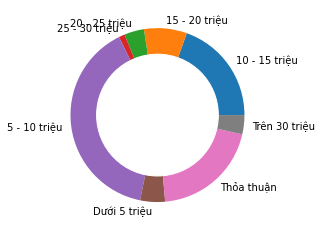

In [48]:
viz_category(dataCenter, 'salary_label')

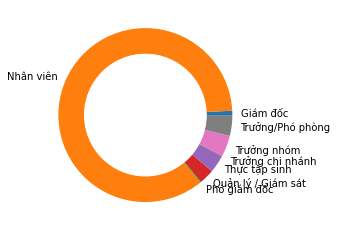

In [49]:
viz_category(dataCenter, 'job_formality')

In [50]:
# dataCenter['salary_label'].plot(kind='bar', title='test')

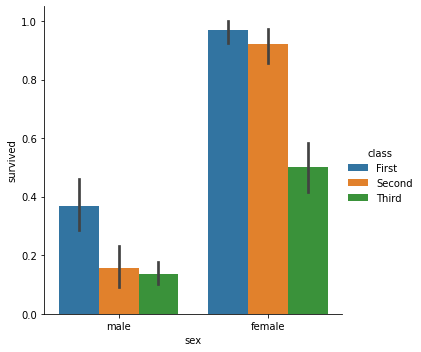

In [51]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

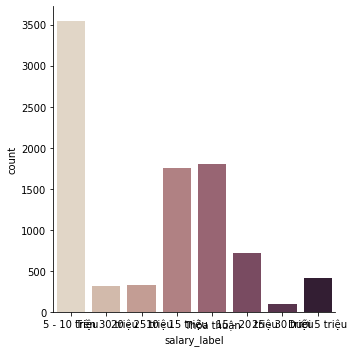

In [52]:
sns.catplot(x="salary_label", kind="count", palette="ch:.25", data=dataCenter, orient="v")

In [130]:
import pandas as pd
__path_to_df = '../../../database/data_center/dataCenter.csv'
__df = pd.read_csv(__path_to_df)

__cols = ['sectors',
 'salary_label',
 'job_attributes',
 'job_formality',
 'required_gender_specific',
 'job_experience_years',
 'job_requirements',
 'company_name',
 'company_address']

__df = __df[__cols]
__df['source'] = 'jobCenter'

_df = __df.copy()
_df['salary_label'] = _df['salary_label'].fillna('Thỏa thuận')
_df['required_gender_specific'] = _df['required_gender_specific'].fillna('Không yêu cầu')
_df['job_experience_years'] = _df['job_experience_years'].fillna('Không yêu cầu kinh nghiệm')

for col in category_cols:
    print(col, "\n______", get_unique(col, _df))

salary_label 
______ ['Thỏa thuận', '20 - 25 triệu', 'Trên 30 triệu', '10 - 15 triệu', '5 - 10 triệu', '25 - 30 triệu', 'Dưới 5 triệu', '15 - 20 triệu']
job_attributes 
______ ['Toàn thời gian', 'Bán thời gian', 'Khác', 'Remote - Làm việc từ xa', 'Thực tập']
job_formality 
______ ['Nhân viên', 'Khác', 'Quản lý / Giám sát', 'Trưởng/Phó phòng', 'Thực tập sinh', 'Phó giám đốc', 'Trưởng nhóm', 'Giám đốc', 'Trưởng chi nhánh']
required_gender_specific 
______ ['Không yêu cầu', 'Nữ', 'Nam']
job_experience_years 
______ ['2 năm', 'Không yêu cầu kinh nghiệm', '5 năm', 'Trên 5 năm', '1 năm', '3 năm', 'Dưới 1 năm', '4 năm']


In [30]:
__df['salary_label'].unique()

array(['Thỏa thuận', '20 - 25 triệu', 'Trên 30 triệu', '10 - 15 triệu',
       '5 - 10 triệu', '25 - 30 triệu', nan, 'Dưới 5 triệu',
       '15 - 20 triệu'], dtype=object)

In [31]:
__df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sectors                   15021 non-null  object
 1   salary_label              14768 non-null  object
 2   job_attributes            15021 non-null  object
 3   job_formality             15021 non-null  object
 4   required_gender_specific  11886 non-null  object
 5   job_experience_years      14533 non-null  object
 6   job_requirements          15012 non-null  object
 7   company_name              14966 non-null  object
 8   company_address           15021 non-null  object
 9   source                    15021 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


In [40]:
for col in category_cols:
    print(col, "\n______", get_unique(col, __df))

salary_label 
______ ['Thỏa thuận', '20 - 25 triệu', 'Trên 30 triệu', '10 - 15 triệu', '5 - 10 triệu', '25 - 30 triệu', nan, 'Dưới 5 triệu', '15 - 20 triệu']
job_attributes 
______ ['Toàn thời gian', 'Bán thời gian', 'Khác', 'Remote - Làm việc từ xa', 'Thực tập']
job_formality 
______ ['Nhân viên', 'Khác', 'Quản lý / Giám sát', 'Trưởng/Phó phòng', 'Thực tập sinh', 'Phó giám đốc', 'Trưởng nhóm', 'Giám đốc', 'Trưởng chi nhánh']
required_gender_specific 
______ [nan, 'Không yêu cầu', 'Nữ', 'Nam']
job_experience_years 
______ ['2 năm', nan, '5 năm', 'Trên 5 năm', '1 năm', '3 năm', 'Dưới 1 năm', '4 năm', 'Không yêu cầu kinh nghiệm']
